In [84]:
import numpy as np
import math
from scipy.stats import norm
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
def Black_Scholes_straight(S0, K, r, sigma, current=0, T=1):
    alpha_pl = (np.log(S0 / K) + (r + sigma**2 / 2) * (T - current)) / sigma / np.sqrt(T - current)
    alpha_ms = (np.log(S0 / K) + (r - sigma**2 / 2) * (T - current)) / sigma / np.sqrt(T - current)
    
    return S0 * norm.cdf(alpha_pl) - K * np.exp(-r * (T-current)) * norm.cdf(alpha_ms)

---
# Task 2

Дифференциальное уравнение Блэка-Шоулза:

$\frac{\partial V}{\partial t} + \frac{\tilde{\sigma}^2}{2}S^2\frac{\partial^2V}{\partial S^2}+rS\frac{\partial V}{\partial S} - rV = 0$

с граничными условиями:

1. $V(S, T) = (S(T) - K)_{+}$, $0 \leq S \leq \infty$
2. $V(0, t) = 0$, $0 \leq t \leq T$
3. $V(s,t) \sim S-Ke^{-r(T-t)}$, $S\to\infty$

Сделать замену переменных: $x = ln(\frac{S}{K})$, $\tau = \frac{\sigma^2}{2}(T-t)$, $u(x,\tau)=\frac{V(S, t)}{S}$

Solution:

Заметим, что $(S\frac{\partial}{\partial S})^2V = S(\frac{\partial V}{\partial S} + S \frac{\partial^2 V}{\partial S^2})$

Тогда перепишем уравнение в виде:

$\frac{\partial V}{\partial t} + \frac{\tilde{\sigma}^2}{2}S^2\frac{\partial^2V}{\partial S^2}+rS\frac{\partial V}{\partial S} - rV = \frac{\partial V}{\partial t} + \frac{\tilde{\sigma}^2}{2}(S\frac{\partial}{\partial S})^2 V + (r - \frac{\tilde{\sigma}^2}{2})S\frac{\partial V}{\partial S} - rV = 0$


1) $x = ln(\frac{S}{K}) \Leftrightarrow S = Ke^{x}$,  $dS = Ke^x dx$

Тогда:

$\frac{\partial V}{\partial t} + \frac{\tilde{\sigma}^2}{2}(S\frac{\partial}{\partial S})^2 V + (r - \frac{\tilde{\sigma}^2}{2})S\frac{\partial V}{\partial S} - rV = \frac{\partial V}{\partial t} + \frac{\tilde{\sigma}^2}{2}(Ke^x\frac{\partial}{Ke^x\partial x})^2 V + (r - \frac{\tilde{\sigma}^2}{2})Ke^x\frac{\partial V}{Ke^x\partial x} -rV = $

$= \frac{\partial V}{\partial t} + \frac{\tilde{\sigma}^2}{2}\frac{\partial^2 V}{\partial x^2} + (r - \frac{\tilde{\sigma}^2}{2})\frac{\partial V}{\partial x} -rV=0$

2. $\tau = \frac{1}{2}\sigma^2(T-t) \Leftrightarrow d\tau = -\frac{1}{2}\sigma^2 dt \Leftrightarrow dt = - \frac{2}{\sigma^2}d\tau$

$-\frac{\sigma^2}{2}\frac{\partial V}{\partial \tau} + \frac{\tilde{\sigma}^2}{2}\frac{\partial^2 V}{\partial x^2} + (r - \frac{\tilde{\sigma}^2}{2})\frac{\partial V}{\partial x} -rV$

3. $v = uS= uKe^x$, $v_{\tau} = u_{\tau}Ke^x$, $v_x = uKe^x + u_xKe^x$, $v_{xx} = uKe^x + 2u_xKe^x + u_{xx}Ke^x$

$-\frac{\sigma^2}{2}\frac{\partial V}{\partial \tau} + \frac{\tilde{\sigma}^2}{2}\frac{\partial^2 V}{\partial x^2} + (r - \frac{\tilde{\sigma}^2}{2})\frac{\partial V}{\partial x} -rV = -\frac{\sigma^2}{2}u_{\tau} + \frac{\tilde{\sigma}^2}{2}(u + 2u_x + u_{xx}) + (r - \frac{\tilde{\sigma}^2}{2})(u + u_x) -ru=$


$=-\frac{\sigma^2}{2}u_{\tau} +  \frac{\tilde{\sigma}^2}{2}(u_{xx} + u_x) + ru_x = 0$


Получаем:

$u_{\tau} -  \frac{\tilde{\sigma}^2}{\sigma^2}(u_{xx} + u_x) - \frac{2r}{\sigma^2}u_x = 0$

с граничными условиями:

1. $V(S, T) = (S(T) - K)_{+} = u(x, \tau)Ke^x = (Ke^x - K)_{+} \leftrightarrow u(x, 0) = (1 - e^{-x})_{+}$, $x\in R$
2. $u(0, \tau) = 0$, $x\to-\infty$
3. $V(s,t) = u(x, \tau)Ke^x  \sim S-Ke^{-r(T-t)} = Ke^x - Ke^{-r\frac{2\tau}{\sigma^2}} \leftrightarrow u(x, \tau) \sim 1 -  e^{-\frac{2r\tau}{\sigma^2} - x}$, $x\to\infty$


В итоге:

$u_{\tau} -  \frac{\tilde{\sigma}^2}{\sigma^2}(u_{xx} + u_x) - \frac{2r}{\sigma^2}u_x = 0$

1. $u(x, 0) = (1 - e^{-x})_{+}$, $x\in R$
2. $u(0, \tau) = 0$, $x\to-\infty$
3. $u(x, \tau) \sim 1 -  e^{-\frac{2r\tau}{\sigma^2} - x}$, $x\to\infty$

---
# Task3

явную схему

$u_{\tau} -  \frac{\tilde{\sigma}^2}{\sigma^2}(u_{xx} + u_x) - \frac{2r}{\sigma^2}u_x = 0$

по условию $\tilde{\sigma}^2 = \sigma^2$:

$u_{\tau} -  u_{xx} +(1 - \frac{2r}{\sigma^2})u_x = 0$

1. $u(x, 0) = (1 - e^{-x})_{+}$, $x\in R$
2. $u(0, \tau) = 0$, $x\to-\infty$
3. $u(x, \tau) \sim 1 -  e^{-\frac{2r\tau}{\sigma^2} - x}$, $x\to\infty$


$u_{\tau} = \frac{u(x, \tau+dt) - u(x, \tau)}{dt}$

$u_x = \frac{u(x+h, \tau) - u(x, \tau)}{h}$

$u_{xx} = \frac{u(x+h, \tau) - 2u(x, \tau) + u(x-h, \tau)}{h^2}$

$u(x, \tau + dt) = u(x, \tau) + dt u_{xx} + dt(\frac{2r}{\sigma^2} + 1)u_x$

$\frac{u_m^{n+1} - u_m^{n+1}}{\tau} = \frac{u_{m+1}^{n+1} - 2u^{n+1}_m + 2u_{m+1}^{n+1}}{h^2} + \phi_m^{n+1}$

In [542]:
def explicit_path_v2(S0, ST, K, r, sigma, N, M, T=1, t0=0):

    S = np.linspace(S0, ST, N)
    t = np.linspace(t0, T, M)
    
    solution = np.zeros((N, M))
    h = S[1] - S[0] 
    dt = t[1] - t[1]
    
    solution[:, -1] = np.where(S - K > 0, S - K, 0)                    
    solution[0, :] = 0                                       
    solution[-1, :] = ST - K * np.exp(-r * (T - t))        
    
    for n in range(M-2, -1, -1):  
        for i in range(1, N-1):  
            solution[i, n] = solution[i, n+1] + dt * sigma**2 * (S[i] / h)**2 / 2 * (solution[i+1, n+1] - 2 * solution[i, n+1] + solution[i-1, n+1]) +\
                      dt * r * S[i] / h * (solution[i+1, n+1] - solution[i-1, n]) -dt * r * solution[i, n+1]
    
    return solution.T

In [543]:
def explicit_path(M, N, r, sigma, S0, K, ST):
    
    """
        M, int - timepoints
        N, int - price points
    """
    
    price_steps = np.linspace(np.log(S0/K), np.log(ST / K), N)
    h = price_steps[1] - price_steps[0]
    taus = (1 - np.linspace(0, 1, M))  * sigma**2 / 2
    # print(taus)
    dt = taus[1] - taus[2]

    payoffs = 1 - np.exp(-2 * r * taus[0] / sigma**2 - price_steps)
    solution = []
    solution.append(np.where(payoffs > 0, payoffs, 0))
    for i in range(1, M-2):
        _sol = [max(1 - np.exp(-2 * r * taus[i] / sigma**2-price_steps[0]), 0)]
        
        for j in range(1, N-1):
            u = solution[-1][j] + dt * (solution[-1][j-1] - 2*solution[-1][j] + solution[-1][j+1]) / h**2 +\
                                    dt * (2*r / sigma**2 + 1) * (solution[-1][j+1] - solution[-1][j-1]) / 2 /h
            _sol.append(u)
        # _sol.append(max(1 - np.exp(-2 * r * taus[-1] / sigma**2-price_steps[0]), 0))
        _sol.append(1 - np.exp(-2 * r * taus[-1] / sigma**2 - price_steps[-1]))
        
        solution.append(_sol)
    return np.array(solution)

tau = 0.0010000 > h^2/2 = 0.0000500


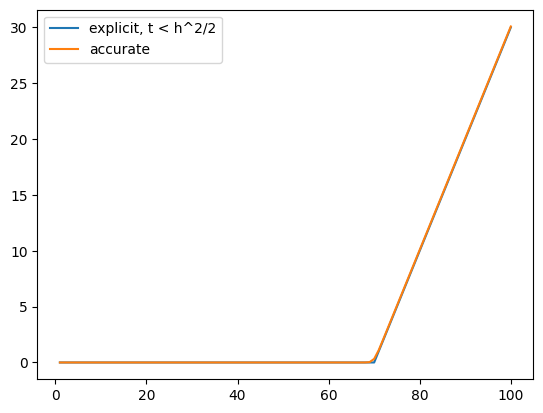

In [544]:
r = 0.12
sigma = 0.1
S0 = 1
K = 70
ST = 100

M = 10**3
N = 10**2
print(f'tau = {1/M:.7f} {">" if 1/M > (1/N)**2 / 2 else "<"} h^2/2 = {(1/N)**2 / 2:.7f}')

# S0, ST, K, r, sigma, N, M, T=1, t0=0

plt.plot(np.linspace(S0, ST, N), explicit_path_v2(S0, ST, K, r, sigma, N, M)[-1], label='explicit, t < h^2/2')

plt.plot(np.linspace(S0, ST, N), Black_Scholes_straight(np.linspace(S0, ST, N), K, r, sigma, current=0.99), label='accurate')

plt.legend()
plt.show()

In [561]:
def SLE_solver(a, b):
    """
        метод прогонки
    """
    n = len(a)
    x = [0 for _ in range(0, n)]

    v = [0 for _ in range(0, n)]
    u = [0 for _ in range(0, n)]

    # прямой ход
    v[0] = a[0][1] / (-a[0][0])
    u[0] = (-b[0]) / (-a[0][0])

    for i in range(1, n-1):
        v[i] = a[i][i+1] / (-a[i][i] - a[i][i-1] * v[i-1])
        u[i] = (a[i][i-1] * u[i-1] - b[i]) / (-a[i][i] - a[i][i-1]*v[i-1])

    # последняя n-1 строка
    v[n-1] = 0
    v[n-1] = (a[n-1][n-2]*u[n-2] - b[n-1]) / (-a[n-1][n-1] - a[n-1][n-2]*v[n-2])

    # обратный ход
    x[n-1] = u[n-1]
    for i in range(n-1, 0, -1):
        x[i-1] = v[i-1] * x[i] + u[i-1]

    return x
    

In [568]:
def implicit_path(ST, S0,  N, M, K, r, sigma, T=1, t0=0):
    S = np.linspace(S0, ST, N + 1)
    t = np.linspace(t0, T, M + 1)
    
    V = np.zeros((N + 1, M + 1))
    h = S[1] - S[0]
    dt = t[1] - t[0]

    # задаем граничные условия
    V[:, -1] = np.maximum(S - K, 0)  
    V[0, :] = 0  
    V[-1, :] = ST - K * np.exp(-r * (T - t))  
    
    A = np.zeros((N - 1, N - 1))
    for i in range(1, N):
        if i > 1:
            A[i-1, i-2] = -dt * sigma**2 * (S[i] / h)**2 / 2 +  0.5 * dt * r * S[i] / h
        A[i-1, i-1] = 1 + dt * sigma**2 * (S[i] / h)**2 + dt * r
        if i < N - 1:
            A[i-1, i] = -dt * sigma**2 * (S[i] / h)**2 / 2 - 0.5 * dt * r * S[i] / h

    
    alpha_beta_plus = dt * sigma**2 * (S[1] / h)**2 / 2 - dt * r * S[1] / h / 2
    alpha_beta_minus = dt * sigma**2 * (S[-2] / h)**2 / 2 + dt * r * S[-2] / h / 2

    for n in range(M-1, -1, -1):
        b = V[1:N, n+1].copy()
        b[0] += alpha_beta_plus * V[0, n]
        b[-1] += alpha_beta_minus * V[-1, n]
        V[1:N, n] = SLE_solver(A, b)

    return V.T

In [576]:
r = 0.12
sigma = 0.1
S0 = 10
K = 70
ST = 100

M = 10**3
N = 10**2

V = implicit_path(ST, S0,  N, M, K, r, sigma, T=1, t0=0.99)

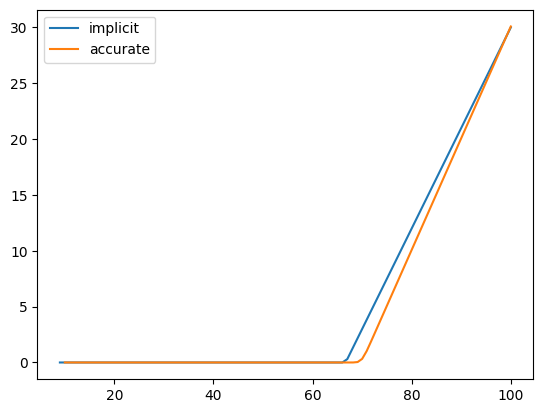

In [578]:
plt.plot(np.linspace(0, ST, N+1)[int(ST/(N+1) * S0):], implicit_path(ST, S0,  N, M, K, r, sigma, T=1, t0=0.99)[-1][int(ST/(N+1) * S0):], label='implicit')
plt.plot(np.linspace(S0, ST, N), Black_Scholes_straight(np.linspace(S0, ST, N), K, r, sigma, current=0.99, T=1), label='accurate')

plt.legend()
plt.show()
# V.shape

$y_{n} = \frac{d_{n}}{b_{n}}; x_{i}=\frac{(d_{i} - c_{i}x_{i+1})}{b_{i}}$

tau = 0.0100000 > h^2/2 = 0.0000005
tau = 0.0001000 < h^2/2 = 0.0050000


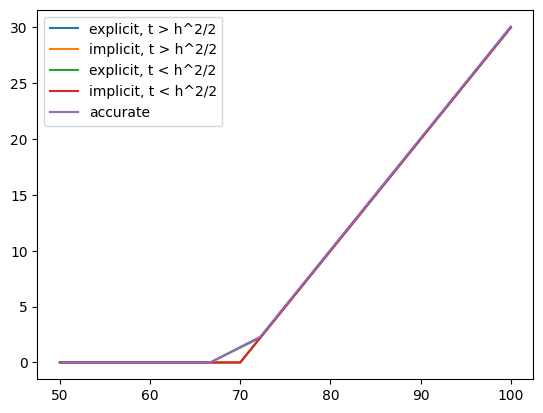

In [575]:
r = 0.12
sigma = 0.1
S0 = 50
K = 70
ST = 100

M = 10**2
N = 10**3
print(f'tau = {1/M:.7f} {">" if 1/M > (1/N)**2 / 2 else "<"} h^2/2 = {(1/N)**2 / 2:.7f}')
option = [Black_Scholes_straight(s, K, r, sigma) for s in np.linspace(S0, ST, N)]
plt.plot(np.linspace(S0, ST, N), explicit_path_v2(S0, ST, K, r, sigma, N, M)[-1], label='explicit, t > h^2/2')
plt.plot(np.linspace(S0, ST, N+1), implicit_path(ST, S0,  N, M, K, r, sigma, T=1, t0=0.99)[-1], label='implicit, t > h^2/2')

M = 10**4
N = 10**1
print(f'tau = {1/M:.7f} {">" if 1/M > (1/N)**2 / 2 else "<"} h^2/2 = {(1/N)**2 / 2:.7f}')
option = [Black_Scholes_straight(s, K, r, sigma) for s in np.linspace(S0, ST, N)]
plt.plot(np.linspace(S0, ST, N), explicit_path_v2(S0, ST, K, r, sigma, N, M)[-1], label='explicit, t < h^2/2')
plt.plot(np.linspace(S0, ST, N+1), implicit_path(ST, S0,  N, M, K, r, sigma, T=1, t0=0.99)[-1], label='implicit, t < h^2/2')

plt.plot(np.linspace(S0, ST, N), Black_Scholes_straight(np.linspace(S0, ST, N), K, r, sigma, current=0.99), label='accurate')

plt.legend()
plt.show()

---
# Task4

Для непостоянной волатильности $\tilde{\sigma}\ne \sigma$ реализовать неявную схему и схему Кранка-Николсона. <br> Сравнить ответ в момент экспирации Т со значением, полученным методом (квази-) Монте-Карло для непостоянной волатильности.

RAPM - Risk Ajusted Pricing Methodology

$\tilde{\sigma}=\sigma^2(1 + 3(\frac{C^2M}{2\pi}SV_{SS})^{\frac{1}{3}})$, где $M>=0$ - мера транзакционных издержек, С - мера премии на риск

In [572]:
def compute_volatility(S, V_SS, sigma, C, M):
    return sigma**2 * (1 + 3 * ((C**2 * M / (2 * np.pi)) * S * V_SS)**(1/3))


def implicit_path_variable_volatility(S0, ST, K, r, sigma, T, t0, N_S, N_t, C, M):
    S = np.linspace(S0, ST, N_S + 1)
    t = np.linspace(t0, T, N_t + 1)
    
    V = np.zeros((N_S + 1, N_t + 1))
    delta_S = ST / N_S
    delta_t = T / N_t

    
    V[:, -1] = np.maximum(S - K, 0)  
    V[0, :] = 0  
    V[-1, :] = ST - K * np.exp(-r * (T - t))

    
    for n in range(N_t-1, -1, -1):
        alpha = 0.5 * delta_t * sigma**2 * (S / delta_S)**2
        beta = 0.5 * delta_t * r * S / delta_S
        gamma = -delta_t * r
        
        A = np.zeros((N_S - 1, N_S - 1))
        for i in range(1, N_S):
            if i > 1:
                A[i-1, i-2] = -alpha[i] + beta[i]
            A[i-1, i-1] = 1 + 2 * alpha[i] - gamma
            if i < N_S - 1:
                A[i-1, i] = -alpha[i] - beta[i]

        
        alpha_beta_plus = alpha[1] - beta[1]
        alpha_beta_minus = alpha[-2] + beta[-2]

        b = V[1:N_S, n+1].copy()
        b[0] += alpha_beta_plus * V[0, n]
        b[-1] += alpha_beta_minus * V[-1, n]
        V[1:N_S, n] = np.linalg.solve(A, b)

        
        for i in range(1, N_S):
            V_SS = (V[i+1, n] - 2 * V[i, n] + V[i-1, n]) / delta_S**2
            sigma_tilde_sq = compute_volatility(S[i], V_SS, sigma, C, M)
            alpha[i] = 0.5 * delta_t * sigma_tilde_sq * (S[i] / delta_S)**2

    return np.array(V).T

In [573]:
def variable_volatility_Monte_Carlo(S0, ST, K, r, sigma, T, t0, N_S, N_t, C, M):
    t_step = (T - t0) / N_t

    S = np.zeros((N_S, N_t)) + S0

    for i in range(1, N_t):
        S[:, i] = S[:, i-1] * np.exp((r - sigma**2 / 2) * (t_step) + sigma * np.sqrt(t_step)*np.random.normal(size=(N_S)))
        
    barrier_factor = np.ones(N_S)

    strike_factor = np.where(S[:, -1] >= K, 1, 0)

    payoffs = np.exp(-r * (T - t0)) * (S[:, -1] - K) * strike_factor 
    return payoffs.mean()

In [574]:
S0 = 50
ST = 100
K = 70
r = 0.12
sigma=0.1
T= 1
t0=0
N_S=10**2
N_t = 10**4

C = 0.001
M = 0.001

v = implicit_path_variable_volatility(S0, ST, K, r, sigma, T, t0, N_S, N_t, C, M)
variable_volatility_Monte_Carlo(S0, ST, K, r, sigma, T, t0, 10**4, N_t, C, M)

/var/folders/xx/x_6wt9hs2vq2twldfgptb5840000gn/T/ipykernel_26239/299208392.py:2: RuntimeWarning: invalid value encountered in scalar power
  return sigma**2 * (1 + 3 * ((C**2 * M / (2 * np.pi)) * S * V_SS)**(1/3))


0.02405934956565965

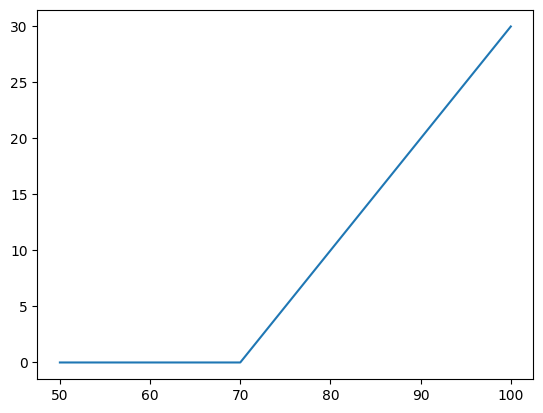

In [286]:
plt.plot(np.linspace(S0, ST, N_S+1), v[-1])